# Dimension Reduction 
If you have too much variables, it can be challengeng to understand relationships between each other and with every other variable the danger of overfitting raise. 

There are two main techniques to reduce number of features: Feature elimination and Feature extraction.

Feature elimination is doing exactly what the name suggest that is elimanating features. We may drop every feature that has no importance based on our knowledge or some other techniques like correlation. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables. As a disadvantage, though, you loose information from dropped variables.

Feature extraction, however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

In [1]:
#import librarires
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
#import data
from sklearn.datasets import load_breast_cancer

In [3]:
#load data
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Breas cancer dataset had 30 features, which can be hard to visualise. So lets reduce amount of features with PCA. 

In [4]:
print(cancer['DESCR']) #describtion of dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = pd.DataFrame(cancer['data'], columns=cancer['feature_names']) #get features
y = pd.DataFrame(cancer['target'], columns = ["cancer"]) # get target 

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We will split dataset into train, validation and test set. On validation set we will select the best number of components our dataset can be reduced to. And we will test that it can maintain it's informative power on test set.

In [7]:
#split into test and train set
df, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#split train further to train and validation set
df, X_val, y_train, y_val = train_test_split(df, y_train, test_size=0.2, random_state=1) 

In [8]:
#check type and null values in train data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 473 to 551
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              364 non-null    float64
 1   mean texture             364 non-null    float64
 2   mean perimeter           364 non-null    float64
 3   mean area                364 non-null    float64
 4   mean smoothness          364 non-null    float64
 5   mean compactness         364 non-null    float64
 6   mean concavity           364 non-null    float64
 7   mean concave points      364 non-null    float64
 8   mean symmetry            364 non-null    float64
 9   mean fractal dimension   364 non-null    float64
 10  radius error             364 non-null    float64
 11  texture error            364 non-null    float64
 12  perimeter error          364 non-null    float64
 13  area error               364 non-null    float64
 14  smoothness error        

In [9]:
#data normalization
scaler = StandardScaler()
scaler.fit(df)

df_s = scaler.transform(df) 
X_test_s = scaler.transform(X_test) 
X_val_s = scaler.transform(X_val) 

# Principal Component analysis (PCA)
Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way. PCA is a method that uses matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions, But how?

1) calculate the mean values of each column

2) center the values in each column by subtracting the mean column value (values will be placed around zero coordinates)

3) calculate the covariance matrix of the centered matrix C. Covariance is a generalized and unnormalized measure of the amount and direction (positive or negative) that two columns change together.

4) calculate the eigendecomposition of the covariance matrix V. Eigenvectors represent the directions or components of the reduced subspace, whereas the eigenvalues represent the magnitudes of the directions. The best components is the component with biggest magnitude of direction, so based on comparing eingenvalues we can select n best components. 

5) project data into the subspace (dot product of data and eingenvector)

When to use PCA?
Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
Do you want to ensure your variables are independent of one another?
Are you comfortable making your independent variables less interpretable?

If you answered “yes” to all three questions, then PCA is a good method to use.




Now let's find out the least number of components that retain as much information as possible.

In [10]:
scores = []

for x in range(1, 20): #number of components in PCA
    model = LogisticRegression() #model to be trained
    pca = PCA(n_components = x) #PCA initialization
    pca.fit(df_s) #fit PCA to train set
    
    x_pca = pca.transform(df_s) #transform train set data
    x_pca_val = pca.transform(X_val_s) #transform validation set data
    
    model.fit(x_pca, y_train["cancer"]) #fit model on reduced data
    
    pred = model.predict(x_pca_val) #prediction on validation data
    scores.append(accuracy_score(y_val, pred)) #save accuracy score 

#find the least number of components with the highest accuracy
print("the highest accuracy: ", max(scores))
max_index = scores.index(max(scores)) #get index of first best score 
n_components = 1 + max_index

print("number of components with the highest accuracy: ", n_components)

#initialize PCA with number of components, that achieved best accuracy score on validation data
pca = PCA(n_components = n_components) 



the highest accuracy:  0.989010989010989
number of components with the highest accuracy:  5


Now let's check the accuracy of model with and without feature extraction on test data

In [11]:
#merge train and validation data, so model can be trained on bigger data

df = df.append(X_val)
y_train = y_train.append(y_val)

In [12]:
#normalize data

scaler = StandardScaler()
scaler.fit(df)
df_s = scaler.transform(df) 
X_test_s = scaler.transform(X_test) 

In [13]:
#fit PCA and then transform data
pca.fit(df_s)
x_pca = pca.transform(df_s)
x_pca_test = pca.transform(X_test_s)

#fit model and predict on test data
model = LogisticRegression()
model.fit(x_pca, y_train["cancer"])
pred = model.predict(x_pca_test)

print("Accuracy on test dataset with PCA:",  accuracy_score(y_test, pred))

Accuracy on test dataset with PCA: 0.9736842105263158


Let's check precision, recall and f1 score. 

In [14]:
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



array([[39,  3],
       [ 0, 72]], dtype=int64)

I would consider this model to be helpful if the false negative rate is near zero, which indeed is. There is some reason for it, doctors would use it only when it can make their job easier. And the best way to do it is by recognising healhy people, so they can use their time to people with higher possibility of having cancer. Doctors than can do another test to remove false positives. 

Now let's fit logistic regression to dataset without PCA and check if PCA haven't removed some usefull information. 

In [15]:
#fit model and predict on test data
model.fit(df_s, y_train["cancer"])
pred = model.predict(X_test_s)
print("Accuracy on test dataset without PCA:",  accuracy_score(y_test, pred))

Accuracy on test dataset without PCA: 0.9736842105263158


So accuracy is the same as with PCA, let's check precision and recall. 

In [16]:
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



array([[40,  2],
       [ 1, 71]], dtype=int64)

Model trained on whole dataset had indeed the same accuracy, but with one false negative sample. And based on the logic mention above, this model is a little bit worse. 

Of course we would need more samples to make this statement statisticly significant, but as an learning example it showed us, that PCA was able to maintain its information power, with only a 5 components as opposed to 30 features.  

With only 5 components it si much easier to visualize data. 

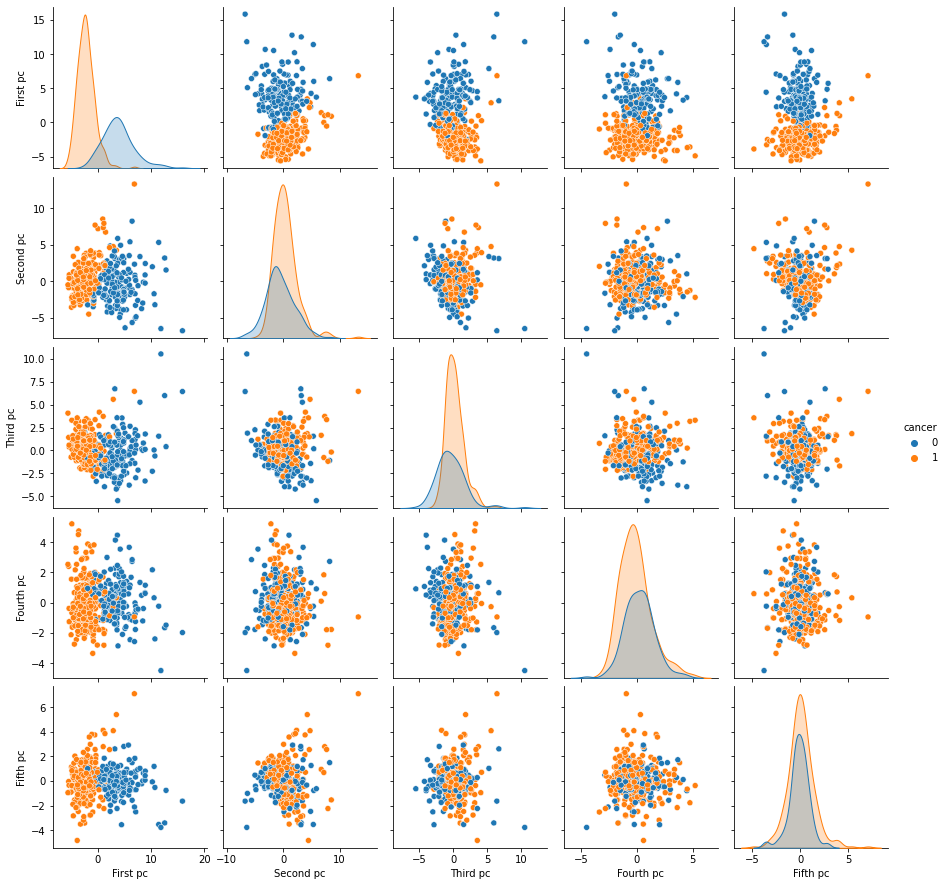

In [17]:
#rename columns
vis_df = pd.DataFrame(x_pca, columns = ["First pc", "Second pc", "Third pc", "Fourth pc", "Fifth pc"])

#add targets to dataframe
vis_df["cancer"] = y_train.reset_index(drop = True)

sns.pairplot(vis_df, hue = 'cancer')

Now we can see the distribution of data on every component. Only the interpretation is problematic. 

But A little bit of interpretation can be extracted from the components it self. But don't forget that data are standardised, so the interpretation is even trickier. 

<AxesSubplot:>

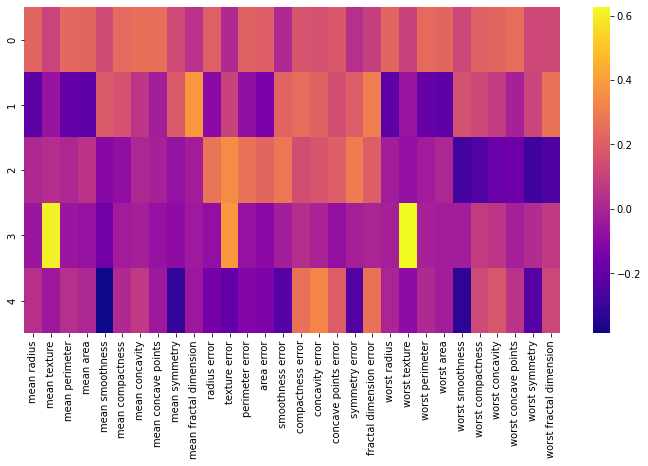

In [18]:
#create heat map of components 
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Now let's visualise how much variance every component explain, and that if we have as many components as we have features, they are able to explain all variance in data. 

In [19]:
pca = PCA(n_components = 30)
pca.fit(df_s)

PCA(n_components=30)

Text(0.5, 0, 'Principal component')

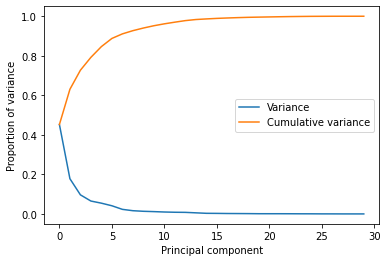

In [20]:
#visualize variance

plt.plot(pca.explained_variance_ratio_, label = "Variance")
plt.plot(pca.explained_variance_ratio_.cumsum(), label = "Cumulative variance")
plt.legend()
plt.ylabel("Proportion of variance")
plt.xlabel("Principal component")

As you can see comulative variance equals to 1, when number of components = 30. And with every other components, explained variance goes down.